BART

In [3]:
from transformers import BartForConditionalGeneration, BartTokenizer
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge

def calculate_rouge(hypothesis, reference):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    rouge_1 = scores[0]['rouge-1']['f']
    rouge_2 = scores[0]['rouge-2']['f']
    rouge_l = scores[0]['rouge-l']['f']
    return rouge_1, rouge_2, rouge_l

def calculate_bleu(hypothesis, reference):
    smoothing = SmoothingFunction().method4
    return sentence_bleu([reference], hypothesis, smoothing_function=smoothing)

def generate_summary(input_text):
    
    # Load pre-trained model and tokenizer
    summary_ratio=0.4
    model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
    tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

    inputs = tokenizer.encode("summarize: " + input_text, return_tensors="pt", truncation=True)
    max_length = int(len(tokenizer.encode(input_text)) * summary_ratio)
    outputs = model.generate(inputs, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary
 
# Load pre-trained model and tokenizer
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

# Example input text
input_text = """
    The Remarkable Career of MS Dhoni: A Journey of Excellence Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational. Born on July 7, 1981, in Ranchi, Jharkhand, Dhoni's early life was modest yet infused with an unwavering passion for cricket. Growing up in a cricket-crazed nation, he honed his skills playing in the dusty fields of Ranchi, with dreams as vast as the Indian sky. His talent caught the eye of local coaches, and soon, Dhoni began his ascent through the ranks of domestic cricket. Dhoni's breakthrough came in 2004 when he made his international debut against Bangladesh in an ODI match. His unconventional batting style, characterized by powerful strokes and fearless aggression, immediately set him apart. But it was his ability to remain calm under pressure and his astute cricketing intelligence that truly defined him. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Under his leadership, India achieved unprecedented success across all formats of the game. His crowning moment came in 2011 when he led the Indian team to victory in the ICC Cricket World Cup, ending a 28-year-long wait for the nation. Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates. He was not just a captain; he was a mentor, a motivator, and a guiding light for the young talents in the team. His leadership style, often described as calm and composed, earned him the nickname 'Captain Cool'. In addition to his leadership prowess, Dhoni's prowess behind the stumps as a wicketkeeper was unparalleled. His lightning-fast reflexes, impeccable glove work, and sharp cricketing acumen made him one of the finest wicketkeepers in the history of the game. His adeptness in finishing matches with his batting, especially in the limited-overs formats, earned him the reputation of being one of the best finishers in world cricket. Dhoni's illustrious career is adorned with numerous accolades and records. He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013. His list of achievements includes multiple awards such as the ICC ODI Player of the Year (2008 and 2009), the Padma Bhushan, and the Rajiv Gandhi Khel Ratna Award. Beyond his on-field heroics, Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field. He remains a role model for millions of aspiring cricketers, not just for his cricketing exploits but also for his exemplary conduct and sportsmanship. As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers. His journey from a small-town boy to a global cricketing icon is a testament to the power of perseverance, dedication, and self-belief. MS Dhoni will forever hold a special place in the hearts of cricket fans worldwide, not just for his achievements but for the values he epitomizes – leadership, resilience, and the spirit of never giving up. In conclusion, the career of MS Dhoni is a shining example of excellence in cricket. His contributions to Indian cricket and the sport as a whole will be cherished for generations to come. As the sun sets on his illustrious career, MS Dhoni leaves behind a legacy that will continue to inspire cricketing enthusiasts around the globe for years to come.
    """


# Generate summary using the model
generated_summary = generate_summary(input_text)

print("Generated Summary:")
print(generated_summary)

# Calculate ROUGE and BLEU scores
rouge_1, rouge_2, rouge_l = calculate_rouge(generated_summary, input_text)
bleu_score = calculate_bleu(generated_summary, input_text)

print("\nROUGE Scores:")
print("ROUGE-1:", rouge_1)
print("ROUGE-2:", rouge_2)
print("ROUGE-L:", rouge_l)

print("\nBLEU Score:", bleu_score)


Generated Summary:
Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance and leadership prowess. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational.

ROUGE Scores:
ROUGE-1: 0.22346368512265535
ROUGE-2: 0.1367521353320184
ROUGE-L: 0.21229050076511347

BLEU Score: 5.303662765491186e-06


In [4]:
from transformers import BartForConditionalGeneration, BartTokenizer
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge

def calculate_rouge(hypothesis, reference):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    rouge_1 = scores[0]['rouge-1']['f']
    rouge_2 = scores[0]['rouge-2']['f']
    rouge_l = scores[0]['rouge-l']['f']
    return rouge_1, rouge_2, rouge_l

def calculate_bleu(hypothesis, reference):
    smoothing = SmoothingFunction().method4
    return sentence_bleu([reference], hypothesis, smoothing_function=smoothing)

def generate_summary(input_text):
    # Load pre-trained model and tokenizer
    model_name = "facebook/bart-large-cnn"
    model = BartForConditionalGeneration.from_pretrained(model_name)
    tokenizer = BartTokenizer.from_pretrained(model_name)

    # Generate summary
    inputs = tokenizer.encode("summarize: " + input_text, return_tensors="pt", truncation=True)
    max_length = int(len(tokenizer.encode(input_text)) * 0.4)
    outputs = model.generate(inputs, length_penalty=2.0, num_beams=4, early_stopping=True)
    generated_summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return generated_summary

def generate_and_evaluate_summary(input_text):
    # Generate summary
    generated_summary = generate_summary(input_text)
    
    # Calculate ROUGE and BLEU scores
    rouge_1, rouge_2, rouge_l = calculate_rouge(generated_summary, input_text)
    bleu_score = calculate_bleu(generated_summary, input_text)
    
    return generated_summary, rouge_1, rouge_2, rouge_l, bleu_score

# Example input text
input_text = """
    The Remarkable Career of MS Dhoni: A Journey of Excellence Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational. Born on July 7, 1981, in Ranchi, Jharkhand, Dhoni's early life was modest yet infused with an unwavering passion for cricket. Growing up in a cricket-crazed nation, he honed his skills playing in the dusty fields of Ranchi, with dreams as vast as the Indian sky. His talent caught the eye of local coaches, and soon, Dhoni began his ascent through the ranks of domestic cricket. Dhoni's breakthrough came in 2004 when he made his international debut against Bangladesh in an ODI match. His unconventional batting style, characterized by powerful strokes and fearless aggression, immediately set him apart. But it was his ability to remain calm under pressure and his astute cricketing intelligence that truly defined him. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Under his leadership, India achieved unprecedented success across all formats of the game. His crowning moment came in 2011 when he led the Indian team to victory in the ICC Cricket World Cup, ending a 28-year-long wait for the nation. Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates. He was not just a captain; he was a mentor, a motivator, and a guiding light for the young talents in the team. His leadership style, often described as calm and composed, earned him the nickname 'Captain Cool'. In addition to his leadership prowess, Dhoni's prowess behind the stumps as a wicketkeeper was unparalleled. His lightning-fast reflexes, impeccable glove work, and sharp cricketing acumen made him one of the finest wicketkeepers in the history of the game. His adeptness in finishing matches with his batting, especially in the limited-overs formats, earned him the reputation of being one of the best finishers in world cricket. Dhoni's illustrious career is adorned with numerous accolades and records. He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013. His list of achievements includes multiple awards such as the ICC ODI Player of the Year (2008 and 2009), the Padma Bhushan, and the Rajiv Gandhi Khel Ratna Award. Beyond his on-field heroics, Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field. He remains a role model for millions of aspiring cricketers, not just for his cricketing exploits but also for his exemplary conduct and sportsmanship. As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers. His journey from a small-town boy to a global cricketing icon is a testament to the power of perseverance, dedication, and self-belief. MS Dhoni will forever hold a special place in the hearts of cricket fans worldwide, not just for his achievements but for the values he epitomizes – leadership, resilience, and the spirit of never giving up. In conclusion, the career of MS Dhoni is a shining example of excellence in cricket. His contributions to Indian cricket and the sport as a whole will be cherished for generations to come. As the sun sets on his illustrious career, MS Dhoni leaves behind a legacy that will continue to inspire cricketing enthusiasts around the globe for years to come.
    """

# Generate and evaluate summary
generated_summary, rouge_1, rouge_2, rouge_l, bleu_score = generate_and_evaluate_summary(input_text)

# Print results
print("Generated Summary:")
print(generated_summary)

print("\nROUGE Scores:")
print("ROUGE-1:", rouge_1)
print("ROUGE-2:", rouge_2)
print("ROUGE-L:", rouge_l)

print("\nBLEU Score:", bleu_score)


Generated Summary:
Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance and leadership prowess. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational.

ROUGE Scores:
ROUGE-1: 0.22346368512265535
ROUGE-2: 0.1367521353320184
ROUGE-L: 0.21229050076511347

BLEU Score: 5.303662765491186e-06


BASELINE

In [3]:
from nltk.tokenize import sent_tokenize
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge

def calculate_rouge(hypothesis, reference):
    if not hypothesis or not reference:
        return 0, 0, 0  # Return zeros if either hypothesis or reference is empty
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    rouge_1 = scores[0]['rouge-1']['f']
    rouge_2 = scores[0]['rouge-2']['f']
    rouge_l = scores[0]['rouge-l']['f']
    return rouge_1, rouge_2, rouge_l

def calculate_bleu(hypothesis, reference):
    if not hypothesis or not reference:
        return 0  # Return zero if either hypothesis or reference is empty
    smoothing = SmoothingFunction().method4
    return sentence_bleu([reference], hypothesis, smoothing_function=smoothing)

def baseline_summarizer(text, summary_ratio=0.4):
    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    # Calculate the length of the summary
    summary_length = max(1, int(len(sentences) * summary_ratio))  # Ensure summary_length is at least 1

    # Select the first 'summary_length' sentences as the summary
    summary = sentences[:summary_length]

    # Join the sentences to form the final summary
    summary = ' '.join(summary)

    return summary

# Example input text
input_text = """
    Adani is also among the most controversial of India’s billionaires for his association with the Bharatiya Janata Party (BJP). His close relationship with the party is not coincidental: Adani frequently refers to his business strategy as motivated by “nation building,” which the Adani Group describes on its website as “helping build world-class infrastructure capabilities to help accelerate the growth of India.” Mundra Port and its associated Adani Special Economic Zone, the central components of Adani’s business empire, were attained and developed in cooperation with the Gujarat state government. The BJP led the Gujarat state government during key moments of the Adani Group’s growth, and the relationship resulted in the symbiotic rise of both the BJP and the Adani Group.
    """

# Generate summary using the baseline model
generated_summary = baseline_summarizer(input_text)

print("Generated Summary:")
print(generated_summary)

# Calculate ROUGE and BLEU scores
rouge_1, rouge_2, rouge_l = calculate_rouge(generated_summary, input_text)
bleu_score = calculate_bleu(generated_summary, input_text)

print("\nROUGE Scores:")
print("ROUGE-1:", rouge_1)
print("ROUGE-2:", rouge_2)
print("ROUGE-L:", rouge_l)

print("\nBLEU Score:", bleu_score)


Generated Summary:

    Adani is also among the most controversial of India’s billionaires for his association with the Bharatiya Janata Party (BJP).

ROUGE Scores:
ROUGE-1: 0.35999999704800006
ROUGE-2: 0.27906976504056247
ROUGE-L: 0.35999999704800006

BLEU Score: 0.006191267889311131


Pegasus

In [4]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

def calculate_rouge(hypothesis, reference):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    rouge_1 = scores[0]['rouge-1']['f']
    rouge_2 = scores[0]['rouge-2']['f']
    rouge_l = scores[0]['rouge-l']['f']
    return rouge_1, rouge_2, rouge_l

def calculate_bleu(hypothesis, reference):
    smoothing = SmoothingFunction().method4
    return sentence_bleu([reference], hypothesis, smoothing_function=smoothing)

def generate_summary(input_text, tokenizer, model, summary_ratio=0.4):
    inputs = tokenizer([input_text], return_tensors="pt", truncation=True)
    max_length = int(len(tokenizer.encode(input_text)) * summary_ratio)
    outputs = model.generate(inputs["input_ids"], max_length=max_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Load pre-trained model and tokenizer
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-large")
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-large")

# Example input text
input_text = """
    Adani is also among the most controversial of India’s billionaires for his association with the Bharatiya Janata Party (BJP). His close relationship with the party is not coincidental: Adani frequently refers to his business strategy as motivated by “nation building,” which the Adani Group describes on its website as “helping build world-class infrastructure capabilities to help accelerate the growth of India.” Mundra Port and its associated Adani Special Economic Zone, the central components of Adani’s business empire, were attained and developed in cooperation with the Gujarat state government. The BJP led the Gujarat state government during key moments of the Adani Group’s growth, and the relationship resulted in the symbiotic rise of both the BJP and the Adani Group.
"""

# Generate summary using the model
generated_summary = generate_summary(input_text, tokenizer, model, summary_ratio=0.4)

print("Generated Summary:")
print(generated_summary)

# Calculate ROUGE and BLEU scores
rouge_1, rouge_2, rouge_l = calculate_rouge(generated_summary, input_text)
bleu_score = calculate_bleu(generated_summary, input_text)

print("\nROUGE Scores:")
print("ROUGE-1:", rouge_1)
print("ROUGE-2:", rouge_2)
print("ROUGE-L:", rouge_l)

print("\nBLEU Score:", bleu_score)


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generated Summary:
His close relationship with the party is not coincidental: Adani frequently refers to his business strategy as motivated by “nation building,” which the Adani Group describes on its website as “helping build world-class infrastructure capabilities to help accelerate the growth of India.” Mundra Port and its associated A

ROUGE Scores:
ROUGE-1: 0.6719999954867201
ROUGE-2: 0.591194964338436
ROUGE-L: 0.6719999954867201

BLEU Score: 0.23416872050554388


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generated Summary: Adani is among the most controversial of India’s billionaires for his association with the Bharatiya Janata Party ( BJP)<n>The BJP led the Gujarat state government during key moments of the Adani Group’s growth, and the relationship resulted in the symbiotic rise of both the BJP and the Adani Group.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generated Summary: His close relationship with the party is not coincidental: Adani frequently refers to his business strategy as motivated by “nation building,” which the Adani Group describes on its website as “helping build world-class infrastructure capabilities to help accelerate the growth of India.” Mundra Port and its associated Adani Special Economic Zone, the central components of Adani’s business empire, were attained and developed in cooperation with the Gujarat state government.


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generated Summary: One of India’s richest men, Gautam Adani, is the founder and chairman of the Adani Group, one of the country’s largest and most influential conglomerates, with interests in mining, energy, and infrastructure.


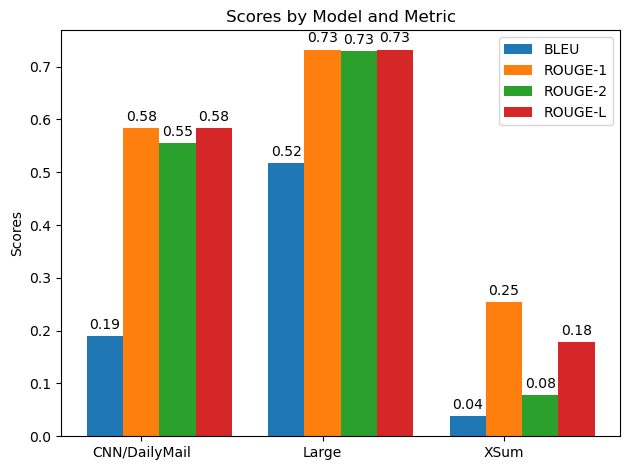

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer

def evaluate_summary(reference_summary, generated_summary):
    # Compute BLEU score
    bleu_score = corpus_bleu([[reference_summary]], [generated_summary])

    # Compute ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    
    return bleu_score, scores

def generate_summary(model_name, input_text):
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name)

    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
    print("Generated Summary:", summary)
    
    return summary

def main():
    input_text = """
    Adani is also among the most controversial of India’s billionaires for his association with the Bharatiya Janata Party (BJP). His close relationship with the party is not coincidental: Adani frequently refers to his business strategy as motivated by “nation building,” which the Adani Group describes on its website as “helping build world-class infrastructure capabilities to help accelerate the growth of India.” Mundra Port and its associated Adani Special Economic Zone, the central components of Adani’s business empire, were attained and developed in cooperation with the Gujarat state government. The BJP led the Gujarat state government during key moments of the Adani Group’s growth, and the relationship resulted in the symbiotic rise of both the BJP and the Adani Group.
    """
    
    models = ["google/pegasus-cnn_dailymail", "google/pegasus-large", "google/pegasus-xsum"]
    model_names = ["CNN/DailyMail", "Large", "XSum"]
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    for model_name in models:
        generated_summary = generate_summary(model_name, input_text)
        bleu_score, rouge_scores = evaluate_summary(input_text, generated_summary)
        
        bleu_scores.append(bleu_score)
        rouge1_scores.append(rouge_scores['rouge1'].fmeasure)
        rouge2_scores.append(rouge_scores['rouge2'].fmeasure)
        rougeL_scores.append(rouge_scores['rougeL'].fmeasure)

    # Plotting bar chart
    labels = model_names
    bleu_means = bleu_scores
    rouge1_means = rouge1_scores
    rouge2_means = rouge2_scores
    rougeL_means = rougeL_scores

    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, bleu_means, width, label='BLEU')
    rects2 = ax.bar(x, rouge1_means, width, label='ROUGE-1')
    rects3 = ax.bar(x + width, rouge2_means, width, label='ROUGE-2')
    rects4 = ax.bar(x + 2*width, rougeL_means, width, label='ROUGE-L')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by Model and Metric')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic


Generated Summaries:
CNN/DailyMail Summary:
MS Dhoni was born on July 7, 1981, in Ranchi, Jharkhand.<n>Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates.<n>He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013.<n>Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field.<n>As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers.

Large Summary:
The Remarkable Career of MS Dhoni: A Journey of Excellence of cricketers Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Hi

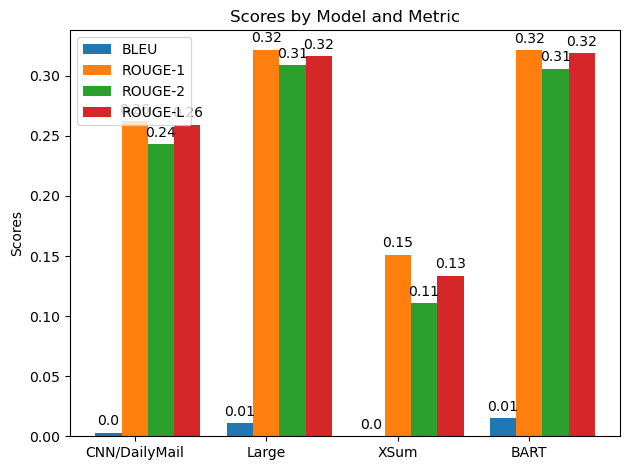

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, BartForConditionalGeneration, BartTokenizer
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def evaluate_summary(reference_summary, generated_summary):
    
    smoothing = SmoothingFunction().method4
    bleu_score = corpus_bleu([[reference_summary]], [generated_summary], smoothing_function=smoothing)

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    
    return bleu_score, scores

def generate_summary(model_name, input_text, max_input_length=10000, summary_ratio=0.3):
   
    if "pegasus" in model_name:
        tokenizer = PegasusTokenizer.from_pretrained(model_name)
        model = PegasusForConditionalGeneration.from_pretrained(model_name)
    elif "bart" in model_name:
        tokenizer = BartTokenizer.from_pretrained(model_name)
        model = BartForConditionalGeneration.from_pretrained(model_name)

    if len(input_text) > max_input_length:
        input_text = input_text[:max_input_length]

    input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True)
    max_summary_length = int(len(input_ids[0]) * summary_ratio)
    min_length = max_summary_length - min(100, max_summary_length)
    
    summary_ids = model.generate(input_ids, max_length=max_summary_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
    return summary

def calculate_scores(model_name, input_text):
   
    generated_summary = generate_summary(model_name, input_text)
    bleu_score, rouge_scores = evaluate_summary(input_text, generated_summary)
    return bleu_score, rouge_scores, generated_summary

def main():
    input_text = """
    
    The Remarkable Career of MS Dhoni: A Journey of Excellence Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational. Born on July 7, 1981, in Ranchi, Jharkhand, Dhoni's early life was modest yet infused with an unwavering passion for cricket. Growing up in a cricket-crazed nation, he honed his skills playing in the dusty fields of Ranchi, with dreams as vast as the Indian sky. His talent caught the eye of local coaches, and soon, Dhoni began his ascent through the ranks of domestic cricket. Dhoni's breakthrough came in 2004 when he made his international debut against Bangladesh in an ODI match. His unconventional batting style, characterized by powerful strokes and fearless aggression, immediately set him apart. But it was his ability to remain calm under pressure and his astute cricketing intelligence that truly defined him. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Under his leadership, India achieved unprecedented success across all formats of the game. His crowning moment came in 2011 when he led the Indian team to victory in the ICC Cricket World Cup, ending a 28-year-long wait for the nation. Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates. He was not just a captain; he was a mentor, a motivator, and a guiding light for the young talents in the team. His leadership style, often described as calm and composed, earned him the nickname 'Captain Cool'. In addition to his leadership prowess, Dhoni's prowess behind the stumps as a wicketkeeper was unparalleled. His lightning-fast reflexes, impeccable glove work, and sharp cricketing acumen made him one of the finest wicketkeepers in the history of the game. His adeptness in finishing matches with his batting, especially in the limited-overs formats, earned him the reputation of being one of the best finishers in world cricket. Dhoni's illustrious career is adorned with numerous accolades and records. He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013. His list of achievements includes multiple awards such as the ICC ODI Player of the Year (2008 and 2009), the Padma Bhushan, and the Rajiv Gandhi Khel Ratna Award. Beyond his on-field heroics, Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field. He remains a role model for millions of aspiring cricketers, not just for his cricketing exploits but also for his exemplary conduct and sportsmanship. As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers. His journey from a small-town boy to a global cricketing icon is a testament to the power of perseverance, dedication, and self-belief. MS Dhoni will forever hold a special place in the hearts of cricket fans worldwide, not just for his achievements but for the values he epitomizes – leadership, resilience, and the spirit of never giving up. In conclusion, the career of MS Dhoni is a shining example of excellence in cricket. His contributions to Indian cricket and the sport as a whole will be cherished for generations to come. As the sun sets on his illustrious career, MS Dhoni leaves behind a legacy that will continue to inspire cricketing enthusiasts around the globe for years to come.
    
    """

    models = ["google/pegasus-cnn_dailymail", "google/pegasus-large", "google/pegasus-xsum", "facebook/bart-large-cnn"]
    model_names = ["CNN/DailyMail", "Large", "XSum", "BART"]
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []
    summaries = []

    for model_name in models:
        bleu_score, rouge_scores, generated_summary = calculate_scores(model_name, input_text)
        
        bleu_scores.append(bleu_score)
        rouge1_scores.append(rouge_scores['rouge1'].fmeasure)
        rouge2_scores.append(rouge_scores['rouge2'].fmeasure)
        rougeL_scores.append(rouge_scores['rougeL'].fmeasure)
        summaries.append(generated_summary)

    print("\nGenerated Summaries:")
    for i, model_name in enumerate(model_names):
        print(f"{model_name} Summary:")
        print(summaries[i])
        print()

    labels = model_names
    bleu_means = bleu_scores
    rouge1_means = rouge1_scores
    rouge2_means = rouge2_scores
    rougeL_means = rougeL_scores

    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, bleu_means, width, label='BLEU')
    rects2 = ax.bar(x, rouge1_means, width, label='ROUGE-1')
    rects3 = ax.bar(x + width, rouge2_means, width, label='ROUGE-2')
    rects4 = ax.bar(x + 2*width, rougeL_means, width, label='ROUGE-L')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by Model and Metric')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()


In [9]:
input_text = """
    
    The Remarkable Career of MS Dhoni: A Journey of Excellence Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational. Born on July 7, 1981, in Ranchi, Jharkhand, Dhoni's early life was modest yet infused with an unwavering passion for cricket. Growing up in a cricket-crazed nation, he honed his skills playing in the dusty fields of Ranchi, with dreams as vast as the Indian sky. His talent caught the eye of local coaches, and soon, Dhoni began his ascent through the ranks of domestic cricket. Dhoni's breakthrough came in 2004 when he made his international debut against Bangladesh in an ODI match. His unconventional batting style, characterized by powerful strokes and fearless aggression, immediately set him apart. But it was his ability to remain calm under pressure and his astute cricketing intelligence that truly defined him. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Under his leadership, India achieved unprecedented success across all formats of the game. His crowning moment came in 2011 when he led the Indian team to victory in the ICC Cricket World Cup, ending a 28-year-long wait for the nation. Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates. He was not just a captain; he was a mentor, a motivator, and a guiding light for the young talents in the team. His leadership style, often described as calm and composed, earned him the nickname 'Captain Cool'. In addition to his leadership prowess, Dhoni's prowess behind the stumps as a wicketkeeper was unparalleled. His lightning-fast reflexes, impeccable glove work, and sharp cricketing acumen made him one of the finest wicketkeepers in the history of the game. His adeptness in finishing matches with his batting, especially in the limited-overs formats, earned him the reputation of being one of the best finishers in world cricket. Dhoni's illustrious career is adorned with numerous accolades and records. He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013. His list of achievements includes multiple awards such as the ICC ODI Player of the Year (2008 and 2009), the Padma Bhushan, and the Rajiv Gandhi Khel Ratna Award. Beyond his on-field heroics, Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field. He remains a role model for millions of aspiring cricketers, not just for his cricketing exploits but also for his exemplary conduct and sportsmanship. As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers. His journey from a small-town boy to a global cricketing icon is a testament to the power of perseverance, dedication, and self-belief. MS Dhoni will forever hold a special place in the hearts of cricket fans worldwide, not just for his achievements but for the values he epitomizes – leadership, resilience, and the spirit of never giving up. In conclusion, the career of MS Dhoni is a shining example of excellence in cricket. His contributions to Indian cricket and the sport as a whole will be cherished for generations to come. As the sun sets on his illustrious career, MS Dhoni leaves behind a legacy that will continue to inspire cricketing enthusiasts around the globe for years to come.
    
    """
    
input_text = """
  
    May 2021 IEEE Instrumentation & Measurement Magazine 91 1094-6969/21/$25.00©2021IEEEAn Overview of IoT -Enabled Monitoring and Control Systems for Electric Vehicles Fazel Mohammadi and Rashid Rashidzadeh As 5G technology becomes operational and contin- ues to expand, smart cities become a reality that is transforming urban life at a rapid pace. Electric Ve- hicles (EV) and automated driving, equipped with Battery Energy Storage Systems (BESSs), are expected to dominate public transportation in smart cities. While new technolo-gies can facilitate efficiency and reduce the costs in a city, they can also present challenges. This paper provides an overview of the technical challenges of real-time monitoring and con-trol of Energy Storage Systems (ESSs) for EVs in smart cities. It also covers the Internet-of-the-Things (IoT) technology that can be utilized to address the challenges and improve the ef-ficiency of Battery Management Systems (BMS). Autonomous Wireless Sensor Networks (WSNs) in smart cities provide the infrastructure to support advanced EV features, such as self-parking. IoT sensors can also be used to determine the State-of-Charge (SoC) in EVs by data-driven methods and cloud computing services. Introduction Energy consumption worldwide is on the rise without any sign of slowing down in the near future. Modern life relies heavily on transportation systems, communication networks, power stations, and other city infrastructure elements. Among technologies aimed at reducing the impact on the environ-ment, Electric Vehicles (EVs) have become a focal point in the climate change discussion [1], [2]. EVs offer a far cleaner and greener means of transportation, but they present challenges concerning efficiency, energy storage, and energy manage-ment. Efficient energy storage is one of the major issues in smart grid [3]. Secure, fast, and reliable data collection must be achieved to yield optimum performance. EV users are expected to have access to the features of vehi- cles and diagnostic information, notably the remaining battery charge referred to as the State-of-Charge (SoC). The device that handles this task is called the Battery Management Sys - tem (BMS), which also evaluates the battery’s State-of-Health (SoH), current, voltage, temperature, etc. A BMS processes a large amount of data to control the performance of a vehicle. Achieving a high energy density for Lithium-ion batteries re-quires fault detection and handling processes to ensure driver and vehicle safety. The Internet-of-the-Things (IoT) includes connected physical devices to share information. IoT networks make data maintenance, device monitoring, and system man-agement more efficient. Smart vehicles are being equipped with numerous sensors, and consumers are able to remotely communicate, monitor, and control their vehicles, thereby making all features nor - mally fixed to the instrument panel available anywhere [4]. This is achieved by IoT actuators and smart sensors for real-time data transmission [5], [6]. The transportation industry is expected to mitigate traffic congestion strategies through IoT-enabled services, such as automated parking systems [7], [8]. IoT technology also provides the hardware needed to facilitate energy exchange between Plug-in Hybrid Electric Ve-hicles (PHEVs) and local electrical utilities with lower power consumption, lower cost, and higher scalability [9], [10]. In IoT-enabled smart cities, EVs can act as energy sources to support the grid as parts of Vehicle-to-Grid (V2G) systems [11]–[15]. IoT technology can be utilized to improve energy management and reduce the negative impact on the environment without compromising the functionality and convenience of modern vehicles [6]. The IoT sensors commonly rely on IP-based proto-cols for communication [3]. Hence, the deployment of remote monitoring applications, such as smart EVs, requires fast, reli-able, and secure internet connectivity [16], [17]. This paper presents IoT technologies to monitor and con- trol Energy Storage Systems (ESSs) for EVs and provides an overview of such technologies in smart cities. The next section describes the IoT implementation in smart cities. IoT-based monitoring and control systems for EVs are discussed subse-quently, and the final section of the paper presents conclusions. IoT Implementation in Smart Cities Mobile Charging Stations The growing number of EVs has created concerns as to how energy should be distributed to consumers in an efficient Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply. 92 IEEE Instrumentation & Measurement Magazine May 2021 and cost-effective manner. Mobile Charging Stations (MCSs) present a practical solution to the problem of efficient energy distribution for EVs [18]–[21]. MCSs can be used alongside the existing Fixed Charge Station (FCS) to ensure easy and reli-able access to energy sources by EVs. MCSs can be relocated as needed to adapt to the emerging EV market. There are many challenges associated with the adoption of EVs by the trans-portation sector. For an FCS installation, utility upgrades are often needed to meet the power demand. Some municipal elec-trical infrastructure cannot make such accommodations, and hence, the EV market is restricted in those regions. Another advantage of MCSs is the ability to store energy at non-peak hours, thereby reducing the load demand on the local electri-cal utility [22]. IoT-collected data, such as the number of EVs, the charg- ing state of their batteries, and the available power can be utilized to improve efficiency. If the power demand can be ef-fectively monitored and forecasted, the impact of MCSs on the EV market becomes significant. Fig. 1 shows an example of an IoT-enabled MCS in a smart city. Parking Systems Parking management and traffic control, particularly in dense urban areas, have become a growing problem, resulting in con-siderable loss of time and revenue [7]. A promising solution to address the related challenges is to integrate and utilize IoT technology. A network of IoT sensors and data collection de-vices can provide the data needed to reduce congestion and maintain efficient traffic flow [8]. A secure, fast, and reliable parking system can be powered by an array of Wi-Fi Access Points (APs), local parking management servers, and a cen-tral server. Together, such devices provide information on parking availability and can reserve spots ahead of time for users, thereby reducing wait times. Wireless Sensor Networks (WSNs) are used to detect the presence or absence of a parked vehicle. A user can select a parking space based on the location, price, and availability. Fig. 2 shows an IoT-based parking sys-tem in a smart city. Public Safety Networks The Third Generation Partnership Project Long Term Evolu-tion, namely 3GPP-LTE, has become the principal structure for mobile message passing, including Public Safety Networks (PSNs) [23]–[25]. Such networks rely on centralized coordina-tion, where a parent node distributes messages to all children nodes. The existing centralized networks are likely to remain the dominant PSN solution. However, decentralized networks play an important role in the emerging smart cities with IoT devices. If the operation of parent nodes (telecommunications tower, GSM satellite, or 5G antennas) in centralized networks is compromised, the PSNs become unreliable, leaving the pub-lic vulnerable. The potential solutions for PSNs are based on decentralized and self-organizing IoT networks that oper - ate as a fail-safe mechanism for the Information Processing in Sensor Networks (IPSNs). The algorithms employed to con-trol and manage such networks need to be optimized in terms of power consumption by IoT devices to meet the operational requirements for decentralized networks. For a design imple-mentation, it is mandatory to adhere to the IPSN standards that govern performance measures, such as latency tolerance and data security [24], [25]. When a network is self-organized, a considerable amount of energy and data loss occurs. In addition, the lifespan of such networks must be taken into consideration. In such networks, the nodes are constantly changing their positions, and there-fore, optimizing their topology for the least number of node hops or smallest displacement vector between nodes is not necessarily the most energy-efficient solution. In addition, such networks must be scalable so that they can be used in both dense urban areas as well as rural environments. One solution is to build a virtual backbone with a cluster of children nodes [26], [27], where the children nodes of Connected-Dominated Sets (CDSs) handle high network traffics. The CDSs allow de-vice-specific information to pass quickly to smaller nodes [28]. Another promising approach developed to maximize Fig. 1. The system model of an IoT-based MCS in a smart city [22]. Fig. 2. The schematic of an IoT-based parking system in a smart city [8]. Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply. May 2021 IEEE Instrumentation & Measurement Magazine 93 energy efficiency is to utilize smart nodes in a tree-based to- pology. In such a network, the message packets are considered as noise until verified by a receiver node. The forwarded mes-sages propagate throughout the network, and each message is delivered multiple times to receiver nodes offering a level of redundancy. Physical obstructions in the signal’s path, i.e., buildings, trees, etc., can be circumvented as long as the node density in the region is adequate. Smart cities deploy millions of battery-operated IoT devices that involve not only the classical centralized com-munication networks but also self-organizing autonomous networks. Many studies conducted on such networks show that Self-Organizing Tree (SOT) along with virtual backbone structures offer the most promising results in the interest of energy savings. Upon further inspection, a dense network consisting of many interconnected devices saves energy more than a network comprised of few devices. Energy efficiency and power consumption have a considerable impact on how future devices stay interconnected in smart cities. Fig. 3 shows an IoT-based PSN comprising several nodes interconnected in a tree. EV Charging Stations IoT is providing an efficient solution to the charging related issues linked with EVs. Several studies have been conducted to observe the impact of IoT incorporation in EVs [30]. Mod-ern EVs are equipped with Lithium-ion batteries, which have a very high energy density, long life, and can be used more efficiently than their predecessors. The results of overcharg-ing Lithium-ion batteries are known to be dangerous, causing toxic fumes, fire, and even explosion [31]. To avoid hazard - ous scenarios and to prolong battery life, a BMS is employed to monitor the characteristics of the battery. SoH, SoC, and charging characteristics are derived from current, voltage, and temperature measurements for each cell in the battery. Such parameters are of interest during both charging and dis-charging cycles. During the charge cycle, the cell charge rates are regulated to ensure all cells are balanced. BMS also en-sures that the current, voltage, and temperature of each cell fall within the predetermined upper and lower safety limits [30]. Passive balancing is the most common, cost-effective cell balancing method where resistance switching is used to ap-proximate the required charge rate. IoT -based Monitoring and Control Systems for EVs Lithium-ion batteries offer many advantages over legacy bat- tery technologies, such as Nickel Metal Hydride or Lead-Acid. Such advantages include higher energy density, low self-dis-charge rates, low maintenance, and no memory effect that are observed in other battery technologies. Due to their increased energy density, Lithium-ion batteries must be monitored to ensure proper operation. Cell current, voltage, and tempera-ture must be maintained within safe limits. In a conventional Lithium-ion battery pack, the pack is segmented into clusters of battery cells, called modules. Each module has a respective Module Management System (MMS). Modules are usually connected in series and parallel to supply the appropriate amount of current and voltage for a given application. The par - allel groups of modules are controlled by BMS and each BMS feeds back the master Battery Energy Storage System (BESS). As the information passes from cell voltage to MMS, and then to the BMS, and before arriving at the BMS for processing, noise and latency are of greater concern. When such a network is utilized in large-scale systems, such as public transportation, the challenges of routing data-lines through various devices, such as vehicles, become a complicated task to manage. Monitoring and Control In [31], a BMS is developed that can control the charging and discharging cycles of a battery pack consisting of four-cell Lithium Ferrite Phosphate (LiFePO 4) batteries. The proposed BMS uses IoT to improve efficiency and reliability. Moreover, it carries the feature of a passive balancing system that uses the Global System for Mobile Communications (GSM) module to transmit the readings of current, voltage, and temperature to a remote server. The battery cells are connected in a series of cells with 10 Ah capacity per cell, where the balancing current is kept at 360 mA. The battery pack is balanced at 12.8 V using passive balancing. The readings for charging and discharging current are observed separately. The cell voltage is contin-uously monitored through a BMS during the charging, and thus, overcharging is protected. The system transmits the mea-surements of current, voltage, temperature to the GSM module through the TTL UART line. This technique is also used in an-other IoT-enabled network, where a command infrastructure is utilized to cut off the charging and discharging from a re-mote server if required. The proposed design uses an 8-bit microprocessor to control the BMS and a 10-bit ADC embed-ded module to read the voltage values. The system operates in five different states [32] that are: the charging state, where the input voltage is higher than a set value; the relaxation state to the battery pack with the minimum current; the balancing state, in which the difference between battery voltage is more than 100 mV; the discharge state, where the input voltage is too low to charge a battery pack; and the critical state to turn off load outputs [33]. The data is sent to a remote sensor by a BMS, Fig. 3. The IoT-based PSN in a smart city [29]. Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply. 94 IEEE Instrumentation & Measurement Magazine May 2021 which helps the evaluation of balancing function and provides information concerning system availability. The results of the experiment in [31] show that IoT technology improves the remote-based control and monitoring of the system consider - ably. IoT technology provides a practical solution to overcome the battery charging and discharging related issues in EVs. IoT cloud-based monitoring is also proposed to support the BESS network topology. Cloud-based monitoring can be utilized for devices in an expandable wireless network. New nodes can be accommodated without interrupting the flow of information. All systems under the aforementioned design are connected wirelessly, eliminating physical vulnerabilities while also adding a level of noise immunity for larger systems. Cloud-based monitoring also offers more storage and data analysis tools to detect defects and outliers within the vehicle battery pack. Certain software tools can flag abnormalities that may be related to the faulty condition of certain vehicle parts. For instance, if a mechanical problem causes a battery mod-ule to fail earlier than the rest, this defect can be detected using cloud-based monitoring software. The EV manufacturers can also be notified if any production defects exist within a par - ticular model or if the overall design has a performance flaw. Manufacturers can use machine learning tools to diagnose and correct problems as they occur, allowing the industry to take a proactive approach to design and improvement. Various simulation models including electrical circuit, thermal, elec-tro-mechanical, and BMS models can be applied to improve the performance of the traditional BESS design architecture. Along with fault diagnosis and passenger safety, opera- tional states, such as SoC calculations, can also be improved. SoC is often calculated using a variety of methods. The chemical method involves measuring the pH of the battery electrolyte. Measuring a battery’s internal pressure is also proven to be useful in calculating SoC for Nickel Metal Hydride batteries. However, this method requires access to the battery’s electrolyte. The current in-tegration method, known as the Coulomb Counting method, involves integrat-ing the measured device current drawn over time, yielding coulombs con-sumed. This requires the device to have an accu-rate reference point for the number of coulombs in a fully charged battery. This method is also more susceptible to errors in measurement that cause long-term drift and inaccu-rate SoC calculations. The voltage method plots the battery pack closed-circuit voltage and compares the data against known curves. The solution must then be corrected for temperature changes and the required current. Given that batteries are voltage sources, which by definition, are meant to maintain a constant voltage, ΔV measured by the system using a voltage method becomes increasingly difficult, particularly for the new gener - ation of batteries. Advanced techniques for SoC calculations involve using statistical filters, such as the Kalman filter, which incorporates the Coulomb Counting method with the voltage method to overcome the shortcomings of either of the two methods. With cloud-based battery monitoring and management, a larger da-tabase can be formed by cloud-based BMS or MMS networks. It is shown in [4] that commercially available cloud database services, such as Firebase/Google, and machine learning tools, such as Google OR-Tools, can be used to further enhance SoC estimation in cloud-enabled BESS networks. Such tools offer correction for battery performance and battery physical and chemical characteristics. It is apparent that with more data storage capacity and access to high-performance cloud com-puting, this method offers better SoC estimation. In [4], it is also reported that Lithium-ion batteries require a specially de-signed system to ensure maximum efficiency, reliability, and system safety. BMS usually supports module communica-tion through wired systems. However, using wired networks adds to the complexity of certain issues, such as difficulty in manufacturing, increased wiring costs, and complex de-sign procedures for battery packets due to isolation concerns. To minimize the wiring complexity in BMSs, research stud - ies on Wireless Battery Management Systems (WBMSs) have been carried out. The WBMS not only minimizes the wiring complexity but also supports location positioning for battery modules [34]. Linear Technologies Corporation has intro-duced a WBMS with an embedded smart mesh, in which different nodes are wirelessly connected to their neighbor - ing nodes. The main node in this system may be overloaded Fig. 4. The schematic of WBMS proposed by Linear Technologies Corporation [4]. Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply. May 2021 IEEE Instrumentation & Measurement Magazine 95 due to multi-directional data collection, which can lead to the network slowdown. Fig. 4 shows the schematic of WBMS pro-posed by Linear Technologies Corporation. It is mentioned in [4] that IoT can provide a reliable solution to the BMS problem. IoT devices containing a communica - tion component and a system-on-chip Integrated Circuit (IC) form the central element of a WBMS. The communication sub-system uses IoT protocols and IoT gateways to communicate with external systems, such as the converter and the inter - nal modules. The IC, which is used for balancing and data acquisition, measures the current, voltage, and temperature of battery cells at a given time and balances the voltage if re-quired. In this method, the IoT nodes elect a leader module by executing a distributed algorithm. The leader node collects the data, which includes the battery power and available ca-pacity of each module node, and sends the aggregated results to the converter to decide whether to continue or stop the bat-tery charging process. The leader node is selected at a specific time through a unique algorithm, known as the Leader Elec-tion Algorithm (LEA), which is executed simultaneously by all nodes. Every node uses a random number to set a unique rank and reads the SoC of the current module. Then, the nodes broadcast the message over a communication medium and receive the message from other module nodes. Once the broad-cast message is received, the nodes check the SoC value and the rank to elect a local leader in their communication range. Certain local leaders then repeat the same process and choose a global leader. Moreover, if the existing leader fails, other nodes can elect a new leader by re-executing the algorithm. The information about the new leader is then communicated to all other nodes. The leader node uses a special IoT protocol, called Message Queuing Telemetry Transport (MQTT), which helps to estimate the SoC of a battery bank. Furthermore, this protocol assists in module-to-module communication. It is ex-pected that the IoT gateway can produce a large amount of data. Hence, it is important to store, process, and quickly ag-gregate the data. This method provides access to the cloud using various user interfaces. The data that is stored tempo-rarily in the memory is sent to the cloud database, which uses different TCP/IP protocols. The proposed IoT wireless system supported by cloud-computing is quite efficient in managing a battery. It can minimize the wire-harness issues and provides higher battery module scalability. Monitoring and Fault Diagnosis The IoT technology along with cloud computing resources can potentially revolutionize the BMS as they are cost-effec-tive and can efficiently determine the health of a battery. They are also adaptable and scalable and can ensure reliability and security in Lithium-ion BESSs [35]. In [35], the main goal is to design a cyber-physical BMS for Lithium-ion batteries by uti-lizing IoT sensors and cloud computing methods. The study incorporates WMMS and a platform for fault diagnosis. In the WMMS, IoT sensors measure the current, voltage, and tem-perature of a battery at a given time. As the nodes cannot store a large amount of data, the data is sent to a cloud server using TCP/IP protocol via an IoT gateway where the data is stored in a cloud data storage. The MMS, on the other hand, receives the results of health monitoring processes from the Cloud Battery Management Platform (CBMP). The CBMP is used to support the battery health monitoring system to detect any defects in battery cells. Fig. 5 shows the proposed CBMP for BESS in [35]. Fig. 5. The proposed CBMP for BESS in [35]. Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply. 96 IEEE Instrumentation & Measurement Magazine May 2021 Energy Exchange The development of IoT-enabled smart cities improves the power efficiency, security, and robustness of systems, and mit-igates the negative environmental impacts [36]. Moving from traditional vehicles to EVs requires balancing between energy consumption and generation [37]. There is a growing inter - est in smaller shared and dispersed systems as a replacement for traditional large-scale ESSs. The emergence of PHEVs and EVs demands a robust and dynamic energy exchange system to replace the current utility model. EVs and PHEVs are capa-ble of supplying energy back into the grid to alleviate power line congestion issues during peak hours. In [38], the impacts of ESSs on power grids are studies and it is indicated that IoT can provide a solution to ESS related issues. If EVs are charged by power grids at a mass-scale or during peak time, power grid congestion occurs, resulting in power outages and/or black-out. An advantage provided by EVs to the grid is the feature of Demand Response (DR), in which the EVs can inject power to the grid during peak hours by V2G capability to avoid power grid overload. EV charging is required to be continuously monitored to achieve grid balancing and minimize the risk of power failure [30]. To avoid the adverse impacts of mass charg-ing of EVs on power grids, IoT technology can be utilized to determine the value of SoC and optimize EV charging while improving power grid stability. Conclusions In this paper, an overview of Internet-of-the-Things (IoT)-en-abled monitoring and control of ESSs for EVs is investigated. IoT-related technologies continue to evolve and adapt to im-prove transportation and utility networks. Energy Storage Systems (ESSs) and optimization for utility grids and com-mercial Electric Vehicles (EVs) are greatly improved utilizing IoT sensors. IoT sensors are expected to be widely deployed in smart city infrastructure a large amount of data to manage EV charging schedules and ensure balanced and stable power grids. Various wireless charging techniques are discussed and compared, and IoT-enabled parking management and traffic control systems for smart cities are presented. References [1] F. Mohammadi, “Design, analysis, and electrification of a solar- power ed electric vehicle,” J. Solar Energy Research, vol. 3, no. 4, Dec. 2018. [2] F. Mohammadi, “Hybridization of an electric vehicle using Lithium-ion batteries,” in Proc. 1st Int. Conf. Modern Approaches in Eng. Sci, Nov. 2018. [3] S. Rinaldi, F. Bonafini, P . Ferrari, A. Flammini, E. Sisinni, D. Di Cara, N. Panzavecchia, G. Tinè, A. Cataliotti, V . Cosentino, and S. Guaiana, “Characterization of IP-based communication for smart grid using software-defined networking,” IEEE Trans. Instrum. Meas., vol. 67, no. 10, Oct. 2018. [4] T. Faika, T . Kim, and M. Khan, “An Internet of Things (IoT)- based network for dispersed and decentralized wireless battery management systems,” in Proc. 2018 IEEE Transportation Electrification Conf. Expo, Jun. 2018.[5] M. Bassoli, V . Bianchi, I. De Munari, and P . Ciampolini, “An IoT approach for an AAL Wi-Fi-based monitoring system,” IEEE Trans. Instrum. Meas., vol. 66, no. 12, Dec. 2017. [6] A. Pötsch, A. Ber ger, and A. Springer, “Efficient analysis of power consumption behaviour of embedded wireless IoT systems,” in Proc. 2017 IEEE Int. Instrum. Meas. Technol. Conf., May 2017. [7] F. Mohammadi, G.-A. Nazri, and M. Saif, “Modeling and simulation of hybrid electric vehicle using MA TLAB/Simulink,” in Proc. 2019 Int. Conf. Power Generation Syst. Renewable Energy Technol., Aug. 2019. [8] F. Mohammadi, G.-A. Nazri, and M. Saif, “A real-time cloud- based intelligent car parking system for smart cities,” in Proc. 2019 IEEE 2 nd Int. Conf. Info. Comm. Signal Processing, Sep. 2019. [9] H. S. V . S. Kumar Nunna, S. Battula, S. Doolla, and D. Srinivasan, “Ener gy management in smart distribution systems with vehicle- to-grid integrated microgrids,” IEEE Trans. Smart Grid, vol. 8, no. 5, Sep. 2018. [10] M. Rizzi, A. Depari, P . Ferrari, A. Flammini, S. Rinaldi, and E. Sisinni, “Synchronization uncertainty versus power efficiency in LoRaWAN networks,” IEEE Trans. Instrum. Meas., vol. 68, no. 4, Apr. 2019. [11] H.-T. Roh and J.-W . Lee, “Residential demand response scheduling with multiclass appliances in the smart grid,” IEEE Trans. Smart Grid, vol. 7, no. 1, Jan. 2016. [12] N. U. Hassan, Y . I. Khalid, C. Yuen, S. Huang, M. A. Pasha, K. L.Wood, and S. G. Kerk, “Framework for minimum user participation rate determination to achieve specific demand response management objectives in residential smart grids,” Int. J. Electrical Power Energy Syst. vol. 74, Jan. 2016. [13] E. C. Kara, J. S. Macdonald, D. Black, M. Bérges, G. Hug, and S. Kiliccote, “Estimating the benefits of electric vehicle smart char ging at non-residential locations: a data-driven approach,” Applied Energy, vol. 155, Oct. 2015. [14] H. S. V . S. K. Nunna, and S, Doolla, “Demand r esponse in smart distribution system with multiple microgrids,” IEEE Trans. Smart Grid, vol. 3, no. 4, Dec. 2012. [15] F. R. Islam and H. R. Pota, “V2G technology to impr ove wind power quality and stability,” in Proc. 2011 Australian Control Conf., Nov. 2011. [16] S. C. Folea and G. D. Mois, “Lessons learned from the development of wir eless environmental sensors,” IEEE Trans. Instrum. Meas., vol. 69, no. 6, Jun. 2020. [17] L. Lombardo, S. Corbellini, M. Parvis, A. Elsayed, E. Angelini, and S. Grassini, “Wireless sensor network for distributed environmental monitoring,” IEEE Trans. Instrum. Meas., vol. 67, no. 5, May 2018. [18] Y. Liu, Y. Xiang, Y. Tan, B. Wang, J. Liu, and Z. Yang, “Optimal allocation model for EV charging stations coordinating investor and user benefits,” IEEE Access, vol. 6, Jun. 2018. [19] W. Lee, R. Schober and V . W. S. Wong, “An analysis of price competition in heterogeneous electric vehicle charging stations,” IEEE Trans. Smart Grid, vol. 10, no. 4, Jul. 2019. [20] X. Duan, C. Zhao, S. He, P . Cheng, and J. Zhang, “Distributed algorithms to compute W alrasian equilibrium in mobile crowdsensing,” IEEE Trans. Ind. Electron., vol. 64, no. 5, May 2017. [21] Z. Su, Q. Xu, J. Luo, H. Pu, Y . Peng, and R. Lu, “A secure content caching scheme for disaster backup in fog computing enabled Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply. May 2021 IEEE Instrumentation & Measurement Magazine 97 mobile social networks,” IEEE Trans. Ind. Informat. vol. 14, no. 10, Oct. 2018. [22] H. Chen, Z. Su, Y . Hui, and H. Hui, “Dynamic charging optimization for mobile charging stations in Internet of Things,” IEEE Access, vol. 6, Sep. 2018. [23] T. Doumi, M. F . Dolan, S. Tatesh, A. Casati, G. Tsirtsis, K. Anchan, and D. Flore, “LTE for public safety networks,” IEEE Commun. Mag., vol. 51, no. 2, Feb. 2013. [24] L. Xu, J. Xie, X. Xu, and S. Wang, “Enterprise L TE and WiFi interworking system and a proposed network selection solution,” in Proc. 2016 ACM/IEEE Symp. Architectures for Networking and Commun. Syst., Mar. 2016. [25] B. Singh, O. Tirkkonen, Z. Li, M. A. Uusitalo, and R. Wichman, “Selective multi-hop relaying for ultra-reliable communication in a factory Environment,” in Proc. 2016 IEEE 27 th Ann. Int. Symp. Personal, Indoor, and Mobile Radio Commun., Sep. 2016. [26] B. Das and V . Bhar ghavan, “Routing in ad-hoc networks using minimum connected dominating sets,” Int. Conf. Commun., Jun. 1997. [27] P .-J. W an, K. M. Alzoubi, and O. Frieder, “Distributed construction of connected dominating set in wireless ad hoc networks,” Mobile Networks Appl., vol. 9, no. 2, Apr. 2004. [28] J. Y u, N. Wang, G. Wang, and D. Yu, “Connected dominating sets in wireless ad hoc and sensor networks – a comprehensive survey,” Computer Commun., vol. 36, no. 2, Jan. 2013. [29] I. Sohn and S. H. Lee, “A message-passing appr oach to self- organizing Internet-of-Things based public safety networks,” IEEE Access, vol. 6, Nov. 2018. [30] F. Mohammadi, G.-A. Nazri, and M. Saif, “A bidirectional power charging control strategy for plug-in hybrid electric vehicles,” Sustainability, vol. 11, no. 16, Aug. 2019. [31] I˙. A ydın and Ö. Üstün, “A basic battery management system design with IoT feature for LiFePO4 batteries,” in Proc. 2017 10th Int. Conf. Elec. Elect. Eng., Nov.-Dec. 2017. [32] H. Ibrahim, A. Ilinca, and J. Perr on, “Energy storage systems— characteristics and comparisons,” Renewable and Sustainable Energy Rev., vol. 12, no. 5, Jun. 2008. [33] F. Mohammadi, “Design and electrification of an electric vehicle using Lithium-ion batteries,” in Proc. 3rd Int. Conf. Elec. Eng., Oct. 2018.[34] A. Dinger, R. Martin, X. Mosquet, D. Rizoulis, M. Russo, and G. Sticher , “Batteries for electric cars: challenges, opportunities, and the outlook to 2020,” The Boston Consulting Group, Jan. 2010. [35] T. Kim, D. Makwana, A. Adhikaree, J. S. Vagdoda, and Y. Lee, “Cloud-based battery Condition monitoring and fault diagnosis platform for large-scale Lithium-Ion battery energy storage systems,” Energies, vol. 11, no. 1, Jan. 2018. [36] X. Fang, S. Misra, G. Xue, and D. Y ang, “Smart grid—the new and improved power grid: a survey,” IEEE Commun. Surveys Tutorials, vol. 14, no. 4, Dec. 2011. [37] B. P . Roberts and C. Sandber g, “The role of energy storage in development of smart grids,” Proc. IEEE, vol. 99, no. 6, Jun. 2011. [38] M. Asaad, F . Ahmad, M. S. Alam, and Y. Rafat, “IoT enabled electric vehicle’s battery monitoring system,” in Proc. 1st EAI Int. Conf. Smart Grid Assisted Internet of Things, Jul. 2017. Fazel Mohammadi (fazel@uwindsor.ca; fazel.mohammadi@ ieee.org) received the Doctorate degree in Electrical Engineer - ing from the University of Windsor, Windsor, ON, Canada. Dr. Mohammadi is the founder of the Power and Energy Sys-tems Research Laboratory. He is a Senior Member of IEEE and an active member of the International Council on Large Elec-tric Systems (CIGRE), the European Power Electronics and Drives Association, and the Institution of Engineering and Technology (IET). His research interests include power and energy systems, high voltage engineering, power electronics, and smart grid. Rashid Rashidzadeh (M’04–SM’13) (rashidza@uwindsor.ca) is a Senior Member of IEEE, a member of the Research Centre for Integrated Microsystems and an adjunct professor in the Electrical and Computer Engineering Department at the Uni-versity of Windsor, Ontario, Canada. He received the B.S.E.E. degree from Sharif University of Technology, Tehran, Iran and the M.A.Sc. and Ph.D. degrees in electrical engineering from University of Windsor, Ontario, Canada in 2003 and 2007, re-spectively. Dr. Rashidzadeh has a track record of successful collaboration with industry. His research focuses on testabil-ity and hardware security, Internet of Things, radio frequency identification and design-for-test methodologies. Authorized licensed use limited to: Parul Institute of Engineering and Technology. Downloaded on February 27,2023 at 13:59:29 UTC from IEEE Xplore. Restrictions apply.
    
    """

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic


Generated Summaries:
CNN/DailyMail Summary:
MS Dhoni was born on July 7, 1981, in Ranchi, Jharkhand.<n>Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates.<n>He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013.<n>Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field.<n>As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers.

Large Summary:
The Remarkable Career of MS Dhoni: A Journey of Excellence of cricketers Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Hi

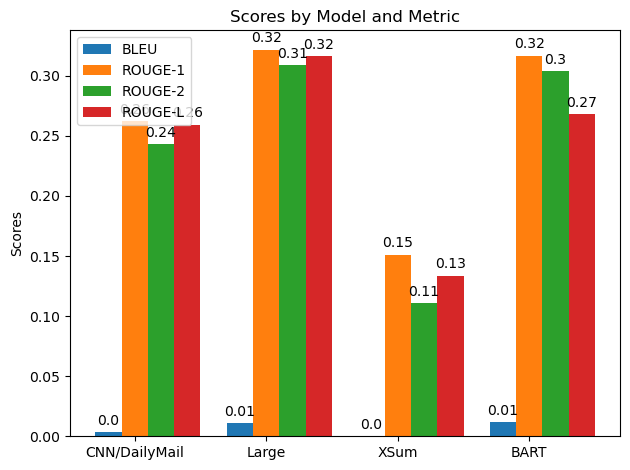

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, BartForConditionalGeneration, BartTokenizer
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def evaluate_summary(reference_summary, generated_summary):
    
    smoothing = SmoothingFunction().method4
    bleu_score = corpus_bleu([[reference_summary]], [generated_summary], smoothing_function=smoothing)

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    
    return bleu_score, scores

def generate_summary(model_name, input_text, max_input_length=10000, summary_ratio=0.3):
   
    if "pegasus" in model_name:
        tokenizer = PegasusTokenizer.from_pretrained(model_name)
        model = PegasusForConditionalGeneration.from_pretrained(model_name)
    elif "bart" in model_name:
        tokenizer = BartTokenizer.from_pretrained(model_name)
        model = BartForConditionalGeneration.from_pretrained(model_name)

    if len(input_text) > max_input_length:
        input_text = input_text[:max_input_length]

    input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True)
    max_summary_length = int(len(input_ids[0]) * summary_ratio)
    min_length = max_summary_length - min(100, max_summary_length)
    
    summary_ids = model.generate(input_ids, max_length=max_summary_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
    return summary

def calculate_scores(model_name, input_text):
   
    generated_summary = generate_summary(model_name, input_text)
    bleu_score, rouge_scores = evaluate_summary(input_text, generated_summary)
    return bleu_score, rouge_scores, generated_summary

def main():
    input_text = """
    The Remarkable Career of MS Dhoni: A Journey of Excellence Mahendra Singh Dhoni, fondly known as MS Dhoni or 'Captain Cool', is a name synonymous with cricketing brilliance, leadership prowess, and unyielding determination. His remarkable journey from a small-town boy to one of the most iconic figures in the history of Indian cricket is nothing short of inspirational. Born on July 7, 1981, in Ranchi, Jharkhand, Dhoni's early life was modest yet infused with an unwavering passion for cricket. Growing up in a cricket-crazed nation, he honed his skills playing in the dusty fields of Ranchi, with dreams as vast as the Indian sky. His talent caught the eye of local coaches, and soon, Dhoni began his ascent through the ranks of domestic cricket. Dhoni's breakthrough came in 2004 when he made his international debut against Bangladesh in an ODI match. His unconventional batting style, characterized by powerful strokes and fearless aggression, immediately set him apart. But it was his ability to remain calm under pressure and his astute cricketing intelligence that truly defined him. One of Dhoni's most significant contributions to Indian cricket came when he was appointed as the captain of the Indian cricket team in 2007. Under his leadership, India achieved unprecedented success across all formats of the game. His crowning moment came in 2011 when he led the Indian team to victory in the ICC Cricket World Cup, ending a 28-year-long wait for the nation. Dhoni's captaincy was marked by innovative strategies, astute decision-making, and a unique ability to inspire his teammates. He was not just a captain; he was a mentor, a motivator, and a guiding light for the young talents in the team. His leadership style, often described as calm and composed, earned him the nickname 'Captain Cool'. In addition to his leadership prowess, Dhoni's prowess behind the stumps as a wicketkeeper was unparalleled. His lightning-fast reflexes, impeccable glove work, and sharp cricketing acumen made him one of the finest wicketkeepers in the history of the game. His adeptness in finishing matches with his batting, especially in the limited-overs formats, earned him the reputation of being one of the best finishers in world cricket. Dhoni's illustrious career is adorned with numerous accolades and records. He is the only captain to win all ICC trophies – the ICC T20 World Cup in 2007, the ICC Cricket World Cup in 2011, and the ICC Champions Trophy in 2013. His list of achievements includes multiple awards such as the ICC ODI Player of the Year (2008 and 2009), the Padma Bhushan, and the Rajiv Gandhi Khel Ratna Award. Beyond his on-field heroics, Dhoni's humility, integrity, and grace have earned him immense respect both on and off the field. He remains a role model for millions of aspiring cricketers, not just for his cricketing exploits but also for his exemplary conduct and sportsmanship. As Dhoni bid farewell to international cricket in 2020, his legacy continues to inspire generations of cricketers. His journey from a small-town boy to a global cricketing icon is a testament to the power of perseverance, dedication, and self-belief. MS Dhoni will forever hold a special place in the hearts of cricket fans worldwide, not just for his achievements but for the values he epitomizes – leadership, resilience, and the spirit of never giving up. In conclusion, the career of MS Dhoni is a shining example of excellence in cricket. His contributions to Indian cricket and the sport as a whole will be cherished for generations to come. As the sun sets on his illustrious career, MS Dhoni leaves behind a legacy that will continue to inspire cricketing enthusiasts around the globe for years to come.
    """

    models = ["google/pegasus-cnn_dailymail", "google/pegasus-large", "google/pegasus-xsum", "facebook/bart-large-cnn"]
    model_names = ["CNN/DailyMail", "Large", "XSum", "BART"]
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []
    summaries = []

    for model_name in models:
        bleu_score, rouge_scores, generated_summary = calculate_scores(model_name, input_text)
        
        bleu_scores.append(bleu_score)
        rouge1_scores.append(rouge_scores['rouge1'].fmeasure)
        rouge2_scores.append(rouge_scores['rouge2'].fmeasure)
        rougeL_scores.append(rouge_scores['rougeL'].fmeasure)
        summaries.append(generated_summary)

    print("\nGenerated Summaries:")
    for i, model_name in enumerate(model_names):
        print(f"{model_name} Summary:")
        print(summaries[i])
        print()

    labels = model_names
    bleu_means = bleu_scores
    rouge1_means = rouge1_scores
    rouge2_means = rouge2_scores
    rougeL_means = rougeL_scores

    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, bleu_means, width, label='BLEU')
    rects2 = ax.bar(x, rouge1_means, width, label='ROUGE-1')
    rects3 = ax.bar(x + width, rouge2_means, width, label='ROUGE-2')
    rects4 = ax.bar(x + 2*width, rougeL_means, width, label='ROUGE-L')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by Model and Metric')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()
